In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap



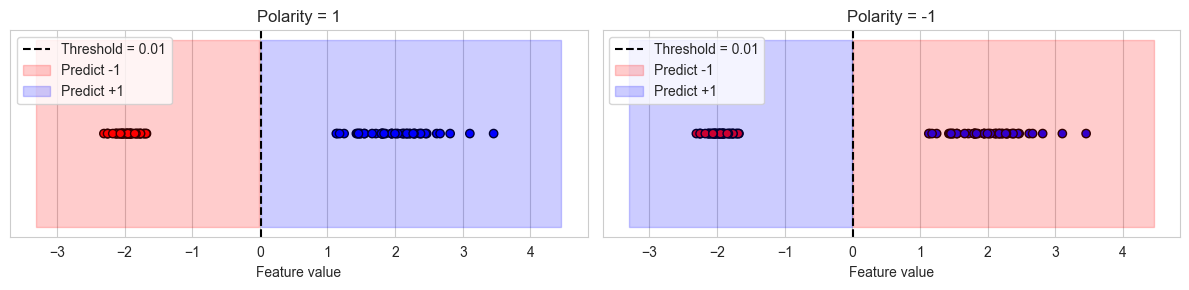

In [2]:

X, y = make_classification(n_samples=100, n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1, flip_y=0,
                           class_sep=2, random_state=42)

y = np.where(y == 0, -1, 1)

threshold = X.mean()
x_vals = np.linspace(X.min() - 1, X.max() + 1, 300)

def plot_polarity(polarity, ax):
    ax.scatter(X, np.zeros_like(X), c=y, cmap=ListedColormap(['red', 'blue']), edgecolor='k')
    ax.axvline(threshold, color='black', linestyle='--', label=f"Threshold = {threshold:.2f}")
    if polarity == 1:
        ax.fill_between(x_vals, -0.1, 0.1, where=(x_vals < threshold), color='red', alpha=0.2, label='Predict -1')
        ax.fill_between(x_vals, -0.1, 0.1, where=(x_vals >= threshold), color='blue', alpha=0.2, label='Predict +1')
    else:
        ax.fill_between(x_vals, -0.1, 0.1, where=(x_vals > threshold), color='red', alpha=0.2, label='Predict -1')
        ax.fill_between(x_vals, -0.1, 0.1, where=(x_vals <= threshold), color='blue', alpha=0.2, label='Predict +1')
    ax.set_title(f"Polarity = {polarity}")
    ax.set_yticks([])
    ax.set_xlabel("Feature value")
    ax.legend(loc="upper left")

fig, axes = plt.subplots(1, 2, figsize=(12, 3))
plot_polarity(polarity=1, ax=axes[0])
plot_polarity(polarity=-1, ax=axes[1])
plt.tight_layout()
plt.show()